### Dipu Ghosh
### Id: 221-35-873
### Section: 37_B1

# Airbnb Seattle Data Analysis and Price Prediction

Dataset description: https://www.kaggle.com/datasets/airbnb/seattle

## Importing all the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBRegressor

In [4]:
# Load the dataset
df = pd.read_csv('listings.csv')
pd.set_option('display.max_columns', None)
df.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

# Data Exploration

In [5]:
df.shape

(3818, 92)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [7]:
df.isnull().sum()

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
name,0
...,...
cancellation_policy,0
require_guest_profile_picture,0
require_guest_phone_verification,0
calculated_host_listings_count,0


In [8]:
missing_cols = df.columns[df.isnull().sum() > 0].tolist()
print(missing_cols)

['summary', 'space', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'zipcode', 'property_type', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'reviews_per_month']


In [9]:

## Checking missing value
## These are the features with nan value

features_in_nan = [features for features in df.columns if df[features].isnull().sum()>= 1]
for feature in features_in_nan:
    print(feature, np.round(df[feature].isnull().mean()*100,5),'%')

summary 4.63594 %
space 14.90309 %
neighborhood_overview 27.02986 %
notes 42.06391 %
transit 24.46307 %
thumbnail_url 8.38135 %
medium_url 8.38135 %
xl_picture_url 8.38135 %
host_name 0.05238 %
host_since 0.05238 %
host_location 0.20953 %
host_about 22.49869 %
host_response_time 13.69827 %
host_response_rate 13.69827 %
host_acceptance_rate 20.2462 %
host_is_superhost 0.05238 %
host_thumbnail_url 0.05238 %
host_picture_url 0.05238 %
host_neighbourhood 7.85752 %
host_listings_count 0.05238 %
host_total_listings_count 0.05238 %
host_verifications 0.05238 %
host_has_profile_pic 0.05238 %
host_identity_verified 0.05238 %
neighbourhood 10.89576 %
zipcode 0.18334 %
property_type 0.02619 %
bathrooms 0.41907 %
bedrooms 0.15715 %
beds 0.02619 %
square_feet 97.4594 %
weekly_price 47.38083 %
monthly_price 60.26716 %
security_deposit 51.12624 %
cleaning_fee 26.97748 %
first_review 16.42221 %
last_review 16.42221 %
review_scores_rating 16.94605 %
review_scores_accuracy 17.23415 %
review_scores_clean

In [10]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


#### The dataset has 3,818 listings and 92 columns, including details about each property, the host, prices, availability, and reviews.
#### Many columns are text-based (object type), and several have missing values — especially summary, space, neighborhood_overview, review_scores_value, and reviews_per_month.
#### Some columns like license, picture_url, and host_thumbnail_url may not be useful for our analysis and can be removed later.
#### Important numeric columns like accommodates, bathrooms, and review scores will need to be cleaned and checked for incorrect or missing values.

# Data Visualization

In [11]:
# Set up the visualization style
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

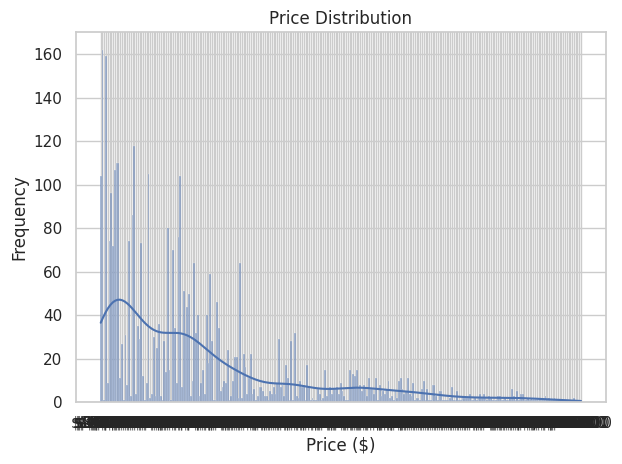

In [12]:
### Price Distribution

#plt.subplot(2, 2, 1)
sns.histplot(df['price'].dropna(), bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

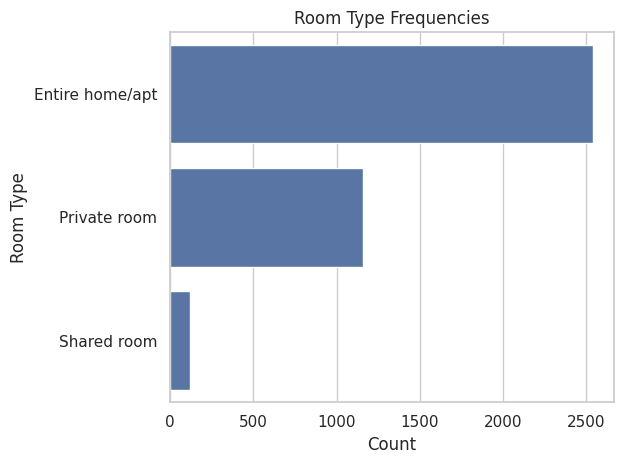

In [13]:
# Room type frequencies

sns.countplot(y='room_type', data=df, order=df['room_type'].value_counts().index)
plt.title('Room Type Frequencies')
plt.xlabel('Count')
plt.ylabel('Room Type')
plt.tight_layout()
plt.show()

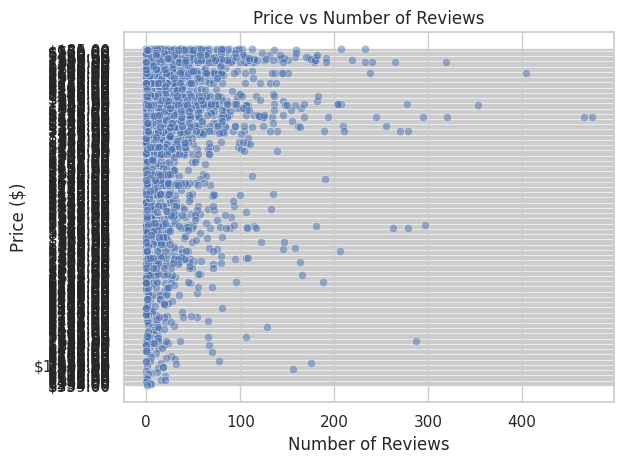

In [14]:
# Price vs number of reviews

sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.5)
plt.title('Price vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

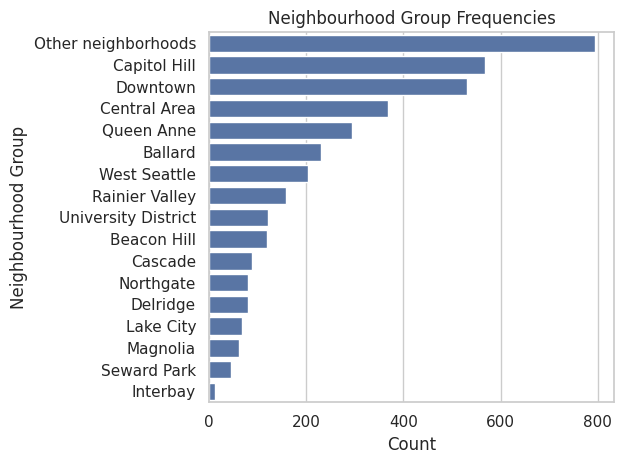

In [15]:
# Neighbourhood group frequencies

sns.countplot(y='neighbourhood_group_cleansed',
              data=df,
              order=df['neighbourhood_group_cleansed'].value_counts().index)
plt.title('Neighbourhood Group Frequencies')
plt.xlabel('Count')
plt.ylabel('Neighbourhood Group')
plt.tight_layout()
plt.show()

# Data Preprocessing

### Data Cleaning

In [16]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

In [17]:
df.shape

(3818, 88)

In [18]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,"$1,000.00",$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and 

In [19]:
# Keep only selected useful columns
columns_to_keep = [
    'neighbourhood_group_cleansed',
    'room_type',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'minimum_nights',
    'availability_365',
    'number_of_reviews',
    'review_scores_rating',
    'review_scores_value',
    'reviews_per_month',
    'amenities',
    'guests_included',
    'maximum_nights',
    'availability_30',
    'price'

]

In [20]:
# Keep only the specified columns

df = df[columns_to_keep]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_group_cleansed  3818 non-null   object 
 1   room_type                     3818 non-null   object 
 2   accommodates                  3818 non-null   int64  
 3   bathrooms                     3802 non-null   float64
 4   bedrooms                      3812 non-null   float64
 5   beds                          3817 non-null   float64
 6   minimum_nights                3818 non-null   int64  
 7   availability_365              3818 non-null   int64  
 8   number_of_reviews             3818 non-null   int64  
 9   review_scores_rating          3171 non-null   float64
 10  review_scores_value           3162 non-null   float64
 11  reviews_per_month             3191 non-null   float64
 12  amenities                     3818 non-null   object 
 13  gue

In [21]:
# Here Target Value 'Price' has object datatype and convert to Float

df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [22]:
df.price.dtypes

dtype('float64')

In [23]:
df.head()

,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,minimum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_value,reviews_per_month,amenities,guests_included,maximum_nights,availability_30,price
0,Queen Anne,Entire home/apt,4,1.0,1.0,1.0,1,346,207,95.0,10.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,365,14,85.0
1,Queen Anne,Entire home/apt,4,1.0,1.0,1.0,2,291,43,96.0,10.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",1,90,13,150.0
2,Queen Anne,Entire home/apt,11,4.5,5.0,7.0,4,220,20,97.0,10.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",10,30,1,975.0
3,Queen Anne,Entire home/apt,3,1.0,0.0,2.0,1,143,0,NaN,NaN,NaN,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",1,1125,0,100.0
4,Queen Anne,Entire home/apt,6,2.0,3.0,3.0,1,365,38,92.0,9.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",6,1125,30,450.0


In [24]:
df.room_type.value_counts()

,count
room_type,
Entire home/apt,2541
Private room,1160
Shared room,117


In [25]:
# Simplified room type
if 'room_type' in df:
    df['simplified_room'] = df['room_type'].replace({
        'Entire home/apt': 'Entire Place',
        'Private room': 'Private',
        'Shared room': 'Shared',
        'Hotel room': 'Hotel'
    })


In [26]:
df.room_type.value_counts()

,count
room_type,
Entire home/apt,2541
Private room,1160
Shared room,117


In [27]:
df['simplified_room'].value_counts()

,count
simplified_room,
Entire Place,2541
Private,1160
Shared,117


In [28]:
df.drop(columns=['room_type'], inplace=True)

In [29]:
df.head()

,neighbourhood_group_cleansed,accommodates,bathrooms,bedrooms,beds,minimum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_value,reviews_per_month,amenities,guests_included,maximum_nights,availability_30,price,simplified_room
0,Queen Anne,4,1.0,1.0,1.0,1,346,207,95.0,10.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,365,14,85.0,Entire Place
1,Queen Anne,4,1.0,1.0,1.0,2,291,43,96.0,10.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",1,90,13,150.0,Entire Place
2,Queen Anne,11,4.5,5.0,7.0,4,220,20,97.0,10.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",10,30,1,975.0,Entire Place
3,Queen Anne,3,1.0,0.0,2.0,1,143,0,NaN,NaN,NaN,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",1,1125,0,100.0,Entire Place
4,Queen Anne,6,2.0,3.0,3.0,1,365,38,92.0,9.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",6,1125,30,450.0,Entire Place


In [30]:
df.amenities.value_counts()

,count
amenities,
{},45
"{Internet,""Wireless Internet"",Kitchen,""Free Parking on Premises"",Heating,Washer,Dryer}",11
"{TV,""Cable TV"",Internet,""Wireless Internet"",Pool,Kitchen,""Free Parking on Premises"",Gym,""Elevator in Building"",""Hot Tub"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""Fire Extinguisher"",Essentials,Shampoo,""24-Hour Check-in"",Hangers,""Hair Dryer"",Iron}",10
"{TV,""Cable TV"",Internet,""Wireless Internet"",Kitchen,""Buzzer/Wireless Intercom"",Heating,Washer,Dryer,Essentials,""24-Hour Check-in"",Hangers,""Hair Dryer"",Iron,""Laptop Friendly Workspace""}",8
"{Internet,""Wireless Internet"",Kitchen,Heating,""Suitable for Events"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Fire Extinguisher"",Essentials}",7
...,...
"{TV,""Cable TV"",Internet,""Wireless Internet"",""Wheelchair Accessible"",Kitchen,""Free Parking on Premises"",Gym,""Elevator in Building"",Heating,Washer,Dryer,""Smoke Detector"",""Fire Extinguisher"",Essentials,Shampoo,Hangers,""Hair Dryer"",Iron}",1
"{TV,Internet,""Wireless Internet"",""Air Conditioning"",""Wheelchair Accessible"",Kitchen,""Pets Allowed"",Gym,""Elevator in Building"",""Buzzer/Wireless Intercom"",Heating,""Family/Kid Friendly"",""Suitable for Events"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Safety Card"",Essentials,Shampoo}",1
"{""Cable TV"",""Wireless Internet"",""Air Conditioning"",Kitchen,""Free Parking on Premises"",Gym,""Elevator in Building"",""Indoor Fireplace"",""Buzzer/Wireless Intercom"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Safety Card"",""Fire Extinguisher"",Essentials,Shampoo}",1


In [31]:
df.isnull().sum()

,0
neighbourhood_group_cleansed,0
accommodates,0
bathrooms,16
bedrooms,6
beds,1
minimum_nights,0
availability_365,0
number_of_reviews,0
review_scores_rating,647
review_scores_value,656


In [32]:
df.shape

(3818, 17)

### Data Pipleine

In [33]:
X = df.drop(['price'], axis= 1)
y = df['price']

In [34]:
le=LabelEncoder()
X['amenities']=le.fit_transform(X['amenities'])

In [35]:
X.head()

,neighbourhood_group_cleansed,accommodates,bathrooms,bedrooms,beds,minimum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_value,reviews_per_month,amenities,guests_included,maximum_nights,availability_30,simplified_room
0,Queen Anne,4,1.0,1.0,1.0,1,346,207,95.0,10.0,4.07,1467,2,365,14,Entire Place
1,Queen Anne,4,1.0,1.0,1.0,2,291,43,96.0,10.0,1.48,2729,1,90,13,Entire Place
2,Queen Anne,11,4.5,5.0,7.0,4,220,20,97.0,10.0,1.15,1350,10,30,1,Entire Place
3,Queen Anne,3,1.0,0.0,2.0,1,143,0,NaN,NaN,NaN,864,1,1125,0,Entire Place
4,Queen Anne,6,2.0,3.0,3.0,1,365,38,92.0,9.0,0.89,2060,6,1125,30,Entire Place


In [36]:
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])



preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, num_features),
        ('categorical', categorical_transformer, cat_features)])

In [37]:
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_value', 'reviews_per_month', 'amenities',
       'guests_included', 'maximum_nights', 'availability_30'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['neighbourhood_group_cleansed', 'simplified_room'], dtype='object'))])

# Train Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [40]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,-1.190519,-0.441437,-0.353436,-0.655632,-0.024048,-0.471197,-0.548257,-2.390446,-2.089612,-1.040009,-1.091500,-0.511487,0.179600,-1.364306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.683286,-0.441437,-0.353436,-0.655632,-0.024048,0.496939,0.053726,-0.115462,0.634689,0.375199,-1.190121,0.275059,-0.407552,-1.364306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.683286,-0.441437,-0.353436,-0.655632,-0.079020,0.906232,1.467077,0.372034,0.634689,2.030272,-1.201662,-0.511487,0.179600,0.841709,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.176053,-0.441437,-0.353436,-0.655632,-0.079020,0.945587,0.027553,-0.277961,0.634689,-0.344399,0.981635,-0.511487,0.179600,1.086822,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.683286,-0.441437,-0.353436,-0.655632,-0.024048,0.890490,-0.260352,0.047036,0.634689,-0.320412,-1.561523,-0.511487,0.179600,0.514892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3049,-0.683286,-0.441437,-0.353436,-0.655632,-0.079020,-1.329138,-0.469737,0.859530,0.634689,0.063373,-1.053731,-0.511487,0.179600,0.024666,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3050,-0.176053,-0.441437,-0.353436,-0.655632,-0.024048,-1.793528,-0.574430,0.209535,0.634689,-0.278436,0.727739,-0.511487,0.179600,-0.057038,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3051,-0.683286,-0.441437,-0.353436,-0.655632,-0.079020,0.945587,-0.574430,0.209535,0.634689,-0.278436,1.677227,-0.511487,0.179600,1.086822,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3052,0.331180,-0.441437,-0.353436,-0.655632,-0.024048,-1.628237,-0.495910,-2.390446,-3.451762,-0.494315,-0.642461,-0.511487,0.179600,0.596596,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Model Training

In [41]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [42]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    'Support Vector Regressor': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42)

}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 59.0395
- Mean Absolute Error: 35.2312
- R2 Score: 0.5722
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 57.0031
- Mean Absolute Error: 35.4063
- R2 Score: 0.5997


Support Vector Regressor
Model performance for Training set
- Root Mean Squared Error: 75.3916
- Mean Absolute Error: 40.0246
- R2 Score: 0.3025
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 74.3772
- Mean Absolute Error: 40.3566
- R2 Score: 0.3184


Decision Tree Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2364
- Mean Absolute Error: 0.0087
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 69.7508
- Mean Absolute Error: 42.8067
- R2 Score: 0.4006




## Hyperparameter Tuning with GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV

# Reduced parameter grids to balance quality vs. speed
param_grids = {
    'Support Vector Regressor': {
        'kernel': ['rbf', 'linear'],
        'C': [1, 10, 100],
        'epsilon': [0.1, 0.5],
        'gamma': ['scale']
    },
    'Decision Tree Regressor': {
        'max_depth': [3, 5, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': [None]
    }
}

# Faster GridSearchCV with reduced CV folds
tuned_models = {}
for name in ['Support Vector Regressor', 'Decision Tree Regressor']:
    grid_search = GridSearchCV(
        estimator=models[name],
        param_grid=param_grids[name],
        cv=3,                      # Fewer folds (original: 5)
        scoring='neg_mean_squared_error',
        n_jobs=-1                  # Parallelize if possible
    )
    grid_search.fit(X_train, y_train)
    tuned_models[name] = grid_search.best_estimator_
    print(f"{name} best parameters: {grid_search.best_params_}")
    print(f"{name} best MSE: {-grid_search.best_score_:.4f}\n")  # Convert to actual MSE

Support Vector Regressor best parameters: {'C': 100, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}
Support Vector Regressor best MSE: 3753.0563

Decision Tree Regressor best parameters: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Regressor best MSE: 4040.3398



In [44]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    'Support Vector Regressor': SVR(C=100, epsilon=0.5, gamma='scale', kernel='rbf'),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=3, min_samples_leaf=2,
                               min_samples_split=2, random_state=42)

}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 59.0395
- Mean Absolute Error: 35.2312
- R2 Score: 0.5722
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 57.0031
- Mean Absolute Error: 35.4063
- R2 Score: 0.5997


Support Vector Regressor
Model performance for Training set
- Root Mean Squared Error: 53.4242
- Mean Absolute Error: 24.4571
- R2 Score: 0.6497
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 56.3626
- Mean Absolute Error: 31.6727
- R2 Score: 0.6086


Decision Tree Regressor
Model performance for Training set
- Root Mean Squared Error: 61.8779
- Mean Absolute Error: 37.3946
- R2 Score: 0.5301
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 62.1331
- Mean Absolute Error: 37.5237
- R2 Score: 0.5243




## Testing evalution with Bootstraping

In [52]:
def bootstrap_evaluate(model, X, y, n_bootstrap=1000):
    mae_list = []
    mse_list = []
    rmse_list = []
    r2_list = []

    for _ in range(n_bootstrap):
        X_resampled, y_resampled = resample(X, y, replace=True)
        preds = model.predict(X_resampled)
        mae_list.append(mean_absolute_error(y_resampled, preds))
        mse_list.append(mean_squared_error(y_resampled, preds))
        rmse_list.append(np.sqrt(mean_squared_error(y_resampled, preds)))
        r2_list.append(r2_score(y_resampled, preds))

    return {
        'MAE': (np.mean(mae_list), np.percentile(mae_list, [2.5, 97.5])),
        'MSE': (np.mean(mse_list), np.percentile(mse_list, [2.5, 97.5])),
        'RMSE': (np.mean(rmse_list), np.percentile(rmse_list, [2.5, 97.5])),
        'R2': (np.mean(r2_list), np.percentile(r2_list, [2.5, 97.5]))
    }

print("Test set evaluation with 95% confidence intervals:")
test_metrics = {}
for name, model in tuned_models.items():
    metrics = bootstrap_evaluate(model, X_test, y_test)
    test_metrics[name] = metrics
    print(f"{name}:")
    for metric, (mean, ci) in metrics.items():
        print(f"  {metric}: {mean:.2f} (95% CI: [{ci[0]:.2f}, {ci[1]:.2f}])")
    print()

Test set evaluation with 95% confidence intervals:
Support Vector Regressor:
  MAE: 31.55 (95% CI: [28.43, 35.16])
  MSE: 3149.20 (95% CI: [2212.06, 4295.23])
  RMSE: 55.91 (95% CI: [47.03, 65.54])
  R2: 0.61 (95% CI: [0.54, 0.68])

Decision Tree Regressor:
  MAE: 37.51 (95% CI: [34.28, 41.07])
  MSE: 3857.37 (95% CI: [2914.37, 5002.88])
  RMSE: 61.95 (95% CI: [53.98, 70.73])
  R2: 0.52 (95% CI: [0.44, 0.60])



### Model Comparison

                          Train MAE   Test MAE    Train MSE     Test MSE  \
Support Vector Regressor  24.457062  31.546759  2854.148201  3149.201332   
Decision Tree Regressor   37.394569  37.509671  3828.880619  3857.369192   

                          Train RMSE  Test RMSE  Train R2   Test R2  \
Support Vector Regressor   53.424229  55.909075  0.649738  0.610634   
Decision Tree Regressor    61.877949  61.952766  0.530119  0.522357   

                          MAE Overfit Ratio  MSE Overfit Ratio  \
Support Vector Regressor           1.289883           1.103377   
Decision Tree Regressor            1.003078           1.007440   

                          RMSE Overfit Ratio  R2 Performance Drop  
Support Vector Regressor            1.046512             0.039104  
Decision Tree Regressor             1.001209             0.007762  


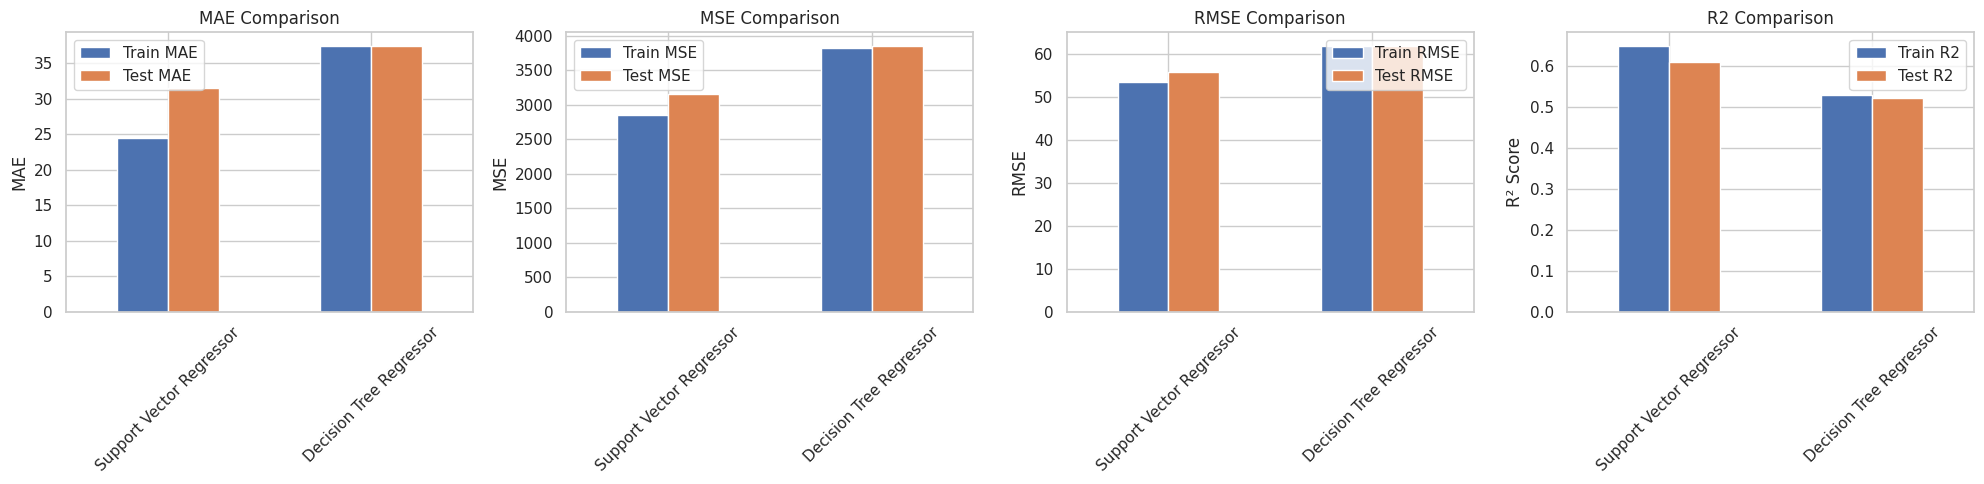

<Figure size 1200x500 with 0 Axes>

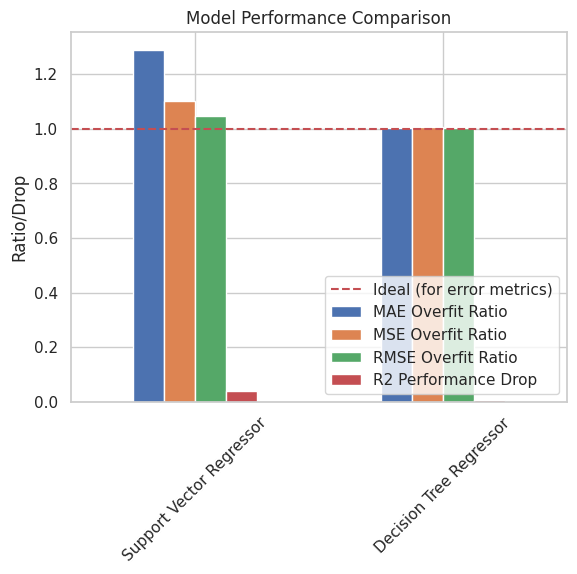

In [54]:

train_metrics = {}
for name, model in tuned_models.items():
    train_pred = model.predict(X_train)
    train_metrics[name] = {
        'MAE': mean_absolute_error(y_train, train_pred),
        'MSE': mean_squared_error(y_train, train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, train_pred)),
        'R2': r2_score(y_train, train_pred)
    }


comparison = pd.DataFrame()

for model_name in train_metrics.keys():
    for metric in ['MAE', 'MSE', 'RMSE', 'R2']:
        comparison.loc[model_name, f'Train {metric}'] = train_metrics[model_name][metric]
        comparison.loc[model_name, f'Test {metric}'] = test_metrics[model_name][metric][0]


for metric in ['MAE', 'MSE', 'RMSE']:
    comparison[f'{metric} Overfit Ratio'] = comparison[f'Test {metric}'] / comparison[f'Train {metric}']


comparison['R2 Performance Drop'] = comparison['Train R2'] - comparison['Test R2']

print(comparison)


metrics_to_plot = ['MAE', 'MSE', 'RMSE', 'R2']
plt.figure(figsize=(20, 5))

for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(1, 4, i)
    comparison[[f'Train {metric}', f'Test {metric}']].plot(kind='bar', ax=plt.gca())
    plt.title(f'{metric} Comparison')
    if metric == 'R2':
        plt.ylabel('R² Score')
    else:
        plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
overfit_metrics = ['MAE Overfit Ratio', 'MSE Overfit Ratio', 'RMSE Overfit Ratio', 'R2 Performance Drop']
comparison[overfit_metrics].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Ratio/Drop')
plt.xticks(rotation=45)
plt.axhline(y=1, color='r', linestyle='--', label='Ideal (for error metrics)')
plt.legend()
plt.show()